<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>


## Trabajo Grupal Clustering - Análisis libre de un catálogo de datos 
## ANÁLISIS DE RELACIÓN ENTRE LAS MUERTES CAUSADAS POR EL COVID 19 Y LA ENFERMEDAD TUBERCULOSIS 
* Cueva Castillo, Tania Piedad
* Intriago Pazmiño, María Monserrate
* Oña Erique, Victor Hugo  
* Yánez Sosapanta, David Gerardo
 


## Descripción problema
Se tienen una data de los casos de covid y muertes diarias por pais, y se tiene una data de los casos reportados de tuberculosis por pais y año. 
Se plantea encontrar posibles relaciones entre los reportes de casos y muertes por covid y los casos de tuberculosis diagnosticados.

In [ ]:
#Esto si le leyerá de la unidad Drive
#import pandas as pd
#df_starup = pd.read_csv(r'customer-segmentation-tutorial-in-python/Mall_Customers.csv')
#df_starup = pd.read_csv('/content/drive/MyDrive/TIA Grupal/data-casos-todo-mundo.csv')
#df_starup.head(1500)

##EMPIEZA AQUI! 
 revisar y dejar solo los import que utilizamos*

In [ ]:
%matplotlib inline
from IPython.display import HTML
import pandas as pd
#from pandas import read_csv 
from pandas.plotting import scatter_matrix

from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import plot_tree
from sklearn.svm import SVC


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


## METRICAS
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#from sklearn.metrics import plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.datasets import make_classification

import numpy as np
import seaborn as sns

from pandas.plotting import scatter_matrix
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
import numpy 

#Cargar github
**df1** es un dataset de los casos de covid de cada pais y reportados diariamente.

**df2** es un dataset con casos de afectación pulmonar por tuberculosis reportados por país y año.

In [ ]:
encoding = 'utf8'

url1 = "https://raw.githubusercontent.com/Taniapcc/tareaUnir/main/data-casos-todo-mundo.csv"
url2 = "https://raw.githubusercontent.com/Taniapcc/tareaUnir/main/data.csv"

df1 = pd.read_csv(url1, sep=",",encoding=encoding)
df2 = pd.read_csv(url2, sep=",",encoding=encoding)


## Dataset 1









In [ ]:
#df_starup.shape
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 non-null  object 
 

In [ ]:
df1 = df1.fillna(0)

In [ ]:
df1.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
61895,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.0
61896,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.0
61897,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.0
61898,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.0
61899,21/03/2020,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.0


In [ ]:
df1_filtrado = df1[df1['year'] > 2018]

## Dataset 2

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4144 entries, 0 to 4143
Data columns (total 8 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Countries, territories and areas                                                4144 non-null   object
 1   Year                                                                            4144 non-null   int64 
 2   New or unknown treatment history cases: Pulmonary, bacteriologically confirmed  2263 non-null   object
 3   New or unknown treatment history cases: Pulmonary, clinically diagnosed         1717 non-null   object
 4   New cases: Pulmonary, smear-positive                                            2419 non-null   object
 5   New cases: Pulmonary, smear-negative/unknown/not done and other new cases       2403 non-null   object
 6   New cases: extrapulmonary

In [ ]:
df2.head(200)

,"Countries, territories and areas",Year,"New or unknown treatment history cases: Pulmonary, bacteriologically confirmed","New or unknown treatment history cases: Pulmonary, clinically diagnosed","New cases: Pulmonary, smear-positive","New cases: Pulmonary, smear-negative/unknown/not done and other new cases",New cases: extrapulmonary,Treatment history unknown
0,Afghanistan,2021,24 715,12 254,NaN,NaN,12 699,NaN
1,Afghanistan,2020,22 888,10 917,NaN,NaN,11 401,NaN
2,Afghanistan,2019,24 358,13 698,NaN,NaN,13 395,NaN
3,Afghanistan,2018,20 485,12 436,NaN,NaN,13 646,NaN
4,Afghanistan,2017,19 479,13 029,NaN,NaN,12 329,NaN
...,...,...,...,...,...,...,...,...
195,Australia,2000,NaN,NaN,251,362,369,NaN
196,Austria,2021,251,20,NaN,NaN,102,NaN
197,Austria,2020,251,26,NaN,NaN,92,NaN
198,Austria,2019,286,25,NaN,NaN,126,NaN


In [ ]:
nuevos_nombres = ['country', 'year','pulmonaryConfirmado', 'pulmonaryDiagnosed', 'newCasesPulmonaryPos', 
                  'newCasesPulmonaryNeg','newCasesExtrapulmonary','treatmentHistoryUnknown']
df2.columns = nuevos_nombres


Preprocesamiento: quitar espacios de cantidades numéricas

In [ ]:
#df2 = df2.fillna(0)
df2['pulmonaryConfirmado'] = df2['pulmonaryConfirmado'].str.replace(' ', '')

df2['pulmonaryDiagnosed'] = df2['pulmonaryDiagnosed'].str.replace(' ', '')

df2['pulmonaryConfirmado'] = df2['pulmonaryConfirmado'].str.replace(' ', '')

df2['newCasesExtrapulmonary'] = df2['newCasesExtrapulmonary'].str.replace(' ', '')
#df2['pulmonaryDiagnosed'] = df2['pulmonaryDiagnosed'].str.replace('NaN', 0)
df2['newCasesPulmonaryPos'] = df2['newCasesPulmonaryPos'].str.replace(' ', '')
df2['newCasesPulmonaryNeg'] = df2['newCasesPulmonaryNeg'].str.replace(' ', '')
df2['treatmentHistoryUnknown'] = df2['treatmentHistoryUnknown'].str.replace(' ', '')

df2 = df2.fillna(0)



In [ ]:
print(df2.isnull().sum())


country                    0
year                       0
pulmonaryConfirmado        0
pulmonaryDiagnosed         0
newCasesPulmonaryPos       0
newCasesPulmonaryNeg       0
newCasesExtrapulmonary     0
treatmentHistoryUnknown    0
dtype: int64


In [ ]:
df2.head(200)


,country,year,pulmonaryConfirmado,pulmonaryDiagnosed,newCasesPulmonaryPos,newCasesPulmonaryNeg,newCasesExtrapulmonary,treatmentHistoryUnknown
0,Afghanistan,2021,24715,12254,0,0,12699,0
1,Afghanistan,2020,22888,10917,0,0,11401,0
2,Afghanistan,2019,24358,13698,0,0,13395,0
3,Afghanistan,2018,20485,12436,0,0,13646,0
4,Afghanistan,2017,19479,13029,0,0,12329,0
...,...,...,...,...,...,...,...,...
195,Australia,2000,0,0,251,362,369,0
196,Austria,2021,251,20,0,0,102,0
197,Austria,2020,251,26,0,0,92,0
198,Austria,2019,286,25,0,0,126,0


In [ ]:
print(df2.value_counts())

country      year  pulmonaryConfirmado  pulmonaryDiagnosed  newCasesPulmonaryPos  newCasesPulmonaryNeg  newCasesExtrapulmonary  treatmentHistoryUnknown
Afghanistan  2000  0                    0                   2892                  2358                  1620                    0                          1
Pakistan     2001  0                    0                   6703                  10435                 2867                    0                          1
Norway       2015  178                  23                  0                     0                     85                      0                          1
             2016  151                  23                  0                     0                     104                     0                          1
             2017  137                  12                  0                     0                     88                      0                          1
                                                               

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4144 entries, 0 to 4143
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   country                  4144 non-null   object
 1   year                     4144 non-null   int64 
 2   pulmonaryConfirmado      4144 non-null   object
 3   pulmonaryDiagnosed       4144 non-null   object
 4   newCasesPulmonaryPos     4144 non-null   object
 5   newCasesPulmonaryNeg     4144 non-null   object
 6   newCasesExtrapulmonary   4144 non-null   object
 7   treatmentHistoryUnknown  4144 non-null   object
dtypes: int64(1), object(7)
memory usage: 259.1+ KB


In [ ]:
df2['pulmonaryConfirmado'] = df2['pulmonaryConfirmado'].astype('int')
df2['pulmonaryDiagnosed'] = df2['pulmonaryDiagnosed'].astype('int')
df2['newCasesPulmonaryPos'] = df2['newCasesPulmonaryPos'].astype('int') 
df2['newCasesPulmonaryNeg'] = df2['newCasesPulmonaryNeg'].astype('int')
df2['newCasesExtrapulmonary'] = df2['newCasesExtrapulmonary'].astype('int') 
df2['treatmentHistoryUnknown'] = df2['treatmentHistoryUnknown'].astype('int')

df2_nuevo= df2.drop(['treatmentHistoryUnknown','newCasesPulmonaryPos','newCasesPulmonaryNeg'], axis=1) 

In [ ]:
df2_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4144 entries, 0 to 4143
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 4144 non-null   object
 1   year                    4144 non-null   int64 
 2   pulmonaryConfirmado     4144 non-null   int64 
 3   pulmonaryDiagnosed      4144 non-null   int64 
 4   newCasesExtrapulmonary  4144 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 162.0+ KB


Se mantiene la data a partir del 2019 que apareció el COVID.

In [ ]:
df2_filtrado = df2_nuevo[df2_nuevo['year'] > 2018]

In [ ]:
df2_filtrado.head()

,country,year,pulmonaryConfirmado,pulmonaryDiagnosed,newCasesExtrapulmonary
0,Afghanistan,2021,24715,12254,12699
1,Afghanistan,2020,22888,10917,11401
2,Afghanistan,2019,24358,13698,13395
22,Albania,2021,168,43,50
23,Albania,2020,134,51,38


# Agrupar filas del dataset 1
Se sumariza cases y deaths, y se saca el promedio de Cumulative_..

Se renombran las columnas a nombres más pequeños.

In [ ]:
grouped_df = df1.groupby(['year', 'countriesAndTerritories', 'popData2019']).agg({'cases': 'sum', 'deaths': 'sum', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000': 'mean'}).reset_index()

nuevos_nombres = ['year', 'country', 'popData2019','cases','deaths','cumulative']
grouped_df.columns = nuevos_nombres

print(grouped_df)


     year            country  popData2019  cases  deaths  cumulative
0    2019        Afghanistan   38041757.0      0       0    0.000000
1    2019            Algeria   43053054.0      0       0    0.000000
2    2019            Armenia    2957728.0      0       0    0.000000
3    2019          Australia   25203200.0      0       0    0.000000
4    2019            Austria    8858775.0      0       0    0.000000
..    ...                ...          ...    ...     ...         ...
276  2020  Wallis_and_Futuna          0.0      3       0    0.000000
277  2020     Western_Sahara     582458.0    766       1    7.844512
278  2020              Yemen   29161922.0   2083     606    0.400630
279  2020             Zambia   17861034.0  18274     367    5.184780
280  2020           Zimbabwe   14645473.0  11246     307    3.810533

[281 rows x 6 columns]


## Se combinan los dos datasets para crear uno solo.

In [ ]:
df_starup = pd.merge(df2_filtrado, grouped_df, on=['country','year'], how='left')

df_starup.head()

,country,year,pulmonaryConfirmado,pulmonaryDiagnosed,newCasesExtrapulmonary,popData2019,cases,deaths,cumulative
0,Afghanistan,2021,24715,12254,12699,NaN,NaN,NaN,NaN
1,Afghanistan,2020,22888,10917,11401,38041757.0,49273.0,1971.0,5.163136
2,Afghanistan,2019,24358,13698,13395,38041757.0,0.0,0.0,0.000000
3,Albania,2021,168,43,50,NaN,NaN,NaN,NaN
4,Albania,2020,134,51,38,2862427.0,48530.0,1003.0,75.327039


## EDA de dataset

In [ ]:
df_starup = df_starup.fillna(0)

In [ ]:
df_starup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 574
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 575 non-null    object 
 1   year                    575 non-null    int64  
 2   pulmonaryConfirmado     575 non-null    int64  
 3   pulmonaryDiagnosed      575 non-null    int64  
 4   newCasesExtrapulmonary  575 non-null    int64  
 5   popData2019             575 non-null    float64
 6   cases                   575 non-null    float64
 7   deaths                  575 non-null    float64
 8   cumulative              575 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 44.9+ KB


## Descripción del Dataset

EDA

Prepraración de la data

In [ ]:
df_starup.tail()

,country,year,pulmonaryConfirmado,pulmonaryDiagnosed,newCasesExtrapulmonary,popData2019,cases,deaths,cumulative
570,Zambia,2020,16975,14989,2848,17861034.0,18274.0,367.0,5.184780
571,Zambia,2019,15949,11967,3596,0.0,0.0,0.0,0.000000
572,Zimbabwe,2021,8311,6228,1134,0.0,0.0,0.0,0.000000
573,Zimbabwe,2020,8072,5913,1140,14645473.0,11246.0,307.0,3.810533
574,Zimbabwe,2019,10061,7868,1957,0.0,0.0,0.0,0.000000


Reemplazar tipos de datos

In [ ]:
df_starup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 574
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 575 non-null    object 
 1   year                    575 non-null    int64  
 2   pulmonaryConfirmado     575 non-null    int64  
 3   pulmonaryDiagnosed      575 non-null    int64  
 4   newCasesExtrapulmonary  575 non-null    int64  
 5   popData2019             575 non-null    float64
 6   cases                   575 non-null    float64
 7   deaths                  575 non-null    float64
 8   cumulative              575 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 44.9+ KB


In [ ]:
df_starup.head()

,country,year,pulmonaryConfirmado,pulmonaryDiagnosed,newCasesExtrapulmonary,popData2019,cases,deaths,cumulative
0,Afghanistan,2021,24715,12254,12699,0.0,0.0,0.0,0.000000
1,Afghanistan,2020,22888,10917,11401,38041757.0,49273.0,1971.0,5.163136
2,Afghanistan,2019,24358,13698,13395,38041757.0,0.0,0.0,0.000000
3,Albania,2021,168,43,50,0.0,0.0,0.0,0.000000
4,Albania,2020,134,51,38,2862427.0,48530.0,1003.0,75.327039


## Label Enconder
Aplicar LabelEncoder a las columnas categóricas

In [ ]:
columnas_categoricas = ['country']

le = LabelEncoder()
df_starup[columnas_categoricas] = df_starup [columnas_categoricas].apply(lambda col: le.fit_transform(col.astype(str)))

df_starup.head()

,country,year,pulmonaryConfirmado,pulmonaryDiagnosed,newCasesExtrapulmonary,popData2019,cases,deaths,cumulative
0,0,2021,24715,12254,12699,0.0,0.0,0.0,0.000000
1,0,2020,22888,10917,11401,38041757.0,49273.0,1971.0,5.163136
2,0,2019,24358,13698,13395,38041757.0,0.0,0.0,0.000000
3,1,2021,168,43,50,0.0,0.0,0.0,0.000000
4,1,2020,134,51,38,2862427.0,48530.0,1003.0,75.327039


In [ ]:
df_covid_pulmon_stats = df_starup.describe()
df_covid_pulmon_stats = df_covid_pulmon_stats.transpose()
df_covid_pulmon_stats
   

,count,mean,std,min,25%,50%,75%,max
country,575.0,9.655478e+01,5.619990e+01,0.0,48.0,97.0,145.0,1.930000e+02
year,575.0,2.019997e+03,8.179104e-01,2019.0,2019.0,2020.0,2021.0,2.021000e+03
pulmonaryConfirmado,575.0,1.551596e+04,6.654043e+04,0.0,142.5,1466.0,6567.5,9.089250e+05
pulmonaryDiagnosed,575.0,1.074735e+04,5.144470e+04,0.0,29.0,356.0,2165.0,7.058070e+05
newCasesExtrapulmonary,575.0,5.650278e+03,3.497198e+04,0.0,50.5,420.0,2400.0,4.782960e+05
popData2019,575.0,1.961360e+07,1.201049e+08,0.0,0.0,0.0,3746939.5,1.433784e+09
cases,575.0,7.967357e+04,5.432369e+05,0.0,0.0,0.0,0.0,9.884100e+06
deaths,575.0,1.867586e+03,1.199188e+04,0.0,0.0,0.0,0.0,1.814020e+05
cumulative,575.0,1.495927e+01,4.565970e+01,0.0,0.0,0.0,0.0,4.651210e+02


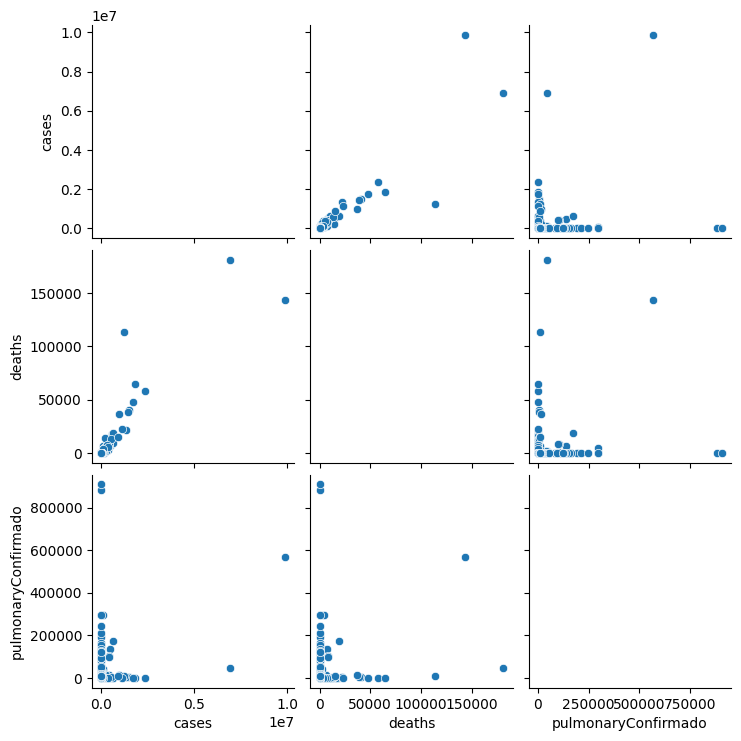

In [ ]:
sns.pairplot(df_starup[["cases", "deaths", "pulmonaryConfirmado"]], diag_kind="country")

# Aplicación de K-Means con dos variables (1)
Se crea un nuevo df con solo dos variables.
Este ejercicio nos permite un análisis de variables de dos en dos y poder visualizar la distribución de los datos.

Se selecciona las variables 'cases' y 'pulmonaryConfirmado'. Considerando que se conoció en medios de comunicación de una alta relación entre diagnósitco de COVID con presencia de enfermedades del pulmón.

##HIPOTESIS 1
La tuberculosis está presente cuando hay diagnóstico de COVID.

In [ ]:
columna1 = 'cases'
columna2 = 'pulmonaryConfirmado'
data = df_starup[[columna1,columna2]]
data.reset_index(drop=True, inplace=True)

data.head(200)


,cases,pulmonaryConfirmado
0,0.0,24715
1,49273.0,22888
2,0.0,24358
3,0.0,168
4,48530.0,134
...,...,...
195,0.0,1375
196,0.0,2362
197,1337078.0,2545
198,0.0,2881


**texto en negrita**## ¿Cuántos clusters? (Elbow Method)

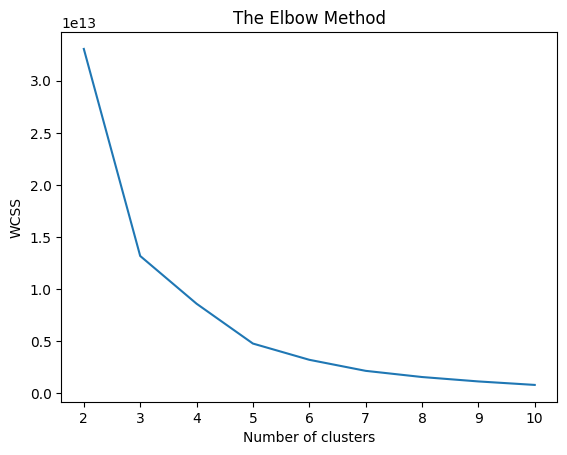

In [ ]:
# Encontrar el número de clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

[texto del enlace](https://)Con base en el gráfico inicialmente se tomó  el número de cluster = 5. Sin embargo, después del análisis se observó que no mejora el análisis de la data con relación a fijar el número de cluster en 3. Por lo cual, se continúa con número de cluster = 3, para el análisis respectivo.

*texto en cursiva*## Definición de clusters k-means

In [ ]:
import warnings
xn_clusters = 3

warnings.filterwarnings('ignore')
kmeans = KMeans(n_clusters = xn_clusters, init = "k-means++", random_state = 42).fit(data)
data['cluster'] = kmeans.labels_
data.tail()


,cases,pulmonaryConfirmado,cluster
570,18274.0,16975,1
571,0.0,15949,1
572,0.0,8311,1
573,11246.0,8072,1
574,0.0,10061,1


In [ ]:
data.head()

,cases,pulmonaryConfirmado,cluster
0,0.0,24715,1
1,49273.0,22888,1
2,0.0,24358,1
3,0.0,168,1
4,48530.0,134,1


#Centros y Máximos valores de los clusters

In [ ]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=[columna1, columna2])
centers['freq'] = data['cluster'].value_counts()
centers['freq_r'] = data['cluster'].value_counts(normalize=True)
print(centers)

# Agrupar el DataFrame por la columna 'cluster' y obtener los valores máximos
cluster_max_values = data.groupby('cluster').max()
print(cluster_max_values)

          cases  pulmonaryConfirmado  freq    freq_r
0  1.448351e+06          5508.200000    10  0.017391
1  2.583080e+04         14654.756661   563  0.979130
2  8.393026e+06        307982.500000     2  0.003478
             cases  pulmonaryConfirmado
cluster                                
0        2376852.0                13367
1         617820.0               908925
2        9884100.0               570237


## Visualización clusters con dos variables
Los centros en cyan

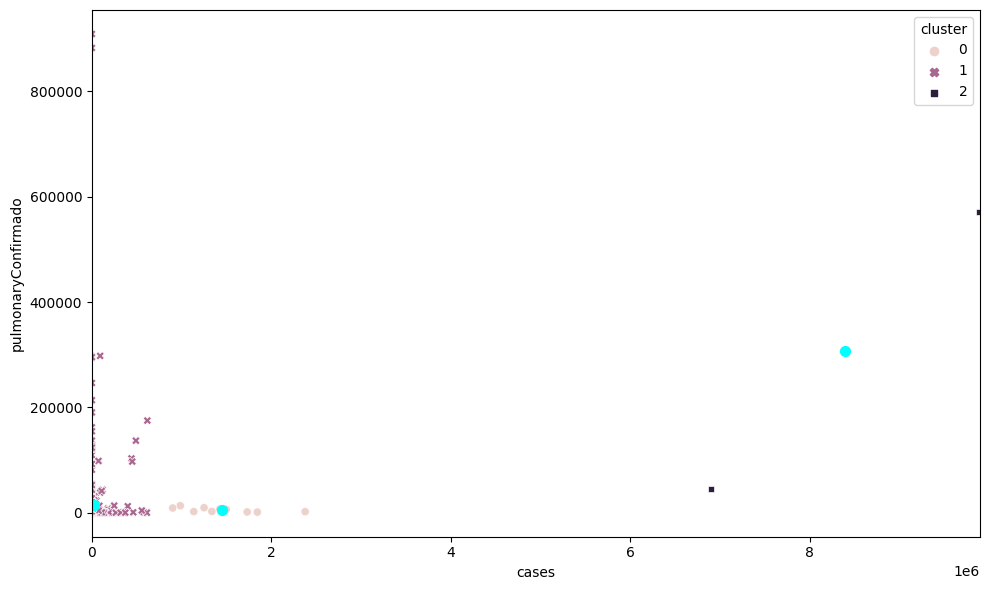

In [ ]:
import seaborn as sns 
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.scatterplot(x=columna1, y=columna2, hue='cluster', style='cluster', 
                     ax=ax, data=data)
ax.set_xlim(0, 9.9e6)
#ax.set_ylim(0,)
centers.plot.scatter(x=columna1, y=columna2, ax=ax, s=50, color='cyan')
plt.tight_layout()
plt.show()

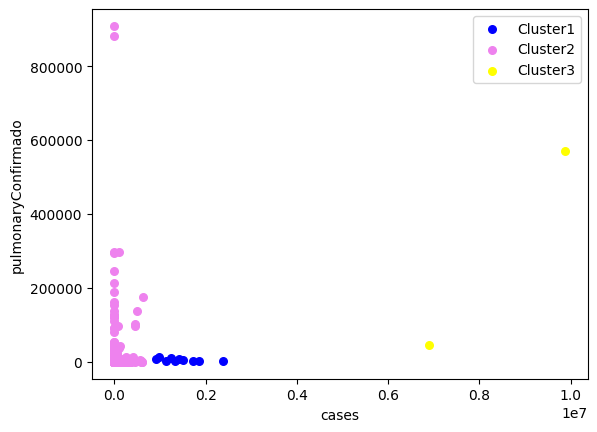

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data[data['cluster']==0][columna1], data[data['cluster']==0][columna2], s = 30, c = 'blue', label = 'Cluster1')
plt.scatter(data[data['cluster']==1][columna1], data[data['cluster']==1][columna2], s = 30, c = 'violet', label = 'Cluster2')
plt.scatter(data[data['cluster']==2][columna1], data[data['cluster']==2][columna2], s = 30, c = 'yellow', label = 'Cluster3')
#plt.scatter(data[data['cluster']==3][columna1], data[data['cluster']==3][columna2], s = 60, c = 'red', label = 'Cluster4')
#plt.scatter(data[data['cluster']==4][columna1], data[data['cluster']==4][columna2], s = 60, c = 'green', label = 'Cluster5') 
#plt.scatter(data[data['cluster']==5][columna1], data[data['cluster']==5][columna2], s = 60, c = 'pink', label = 'Cluster6') 
#plt.scatter(data[data['cluster']==6][columna1], data[data['cluster']==6][columna2], s = 60, c = 'brown', label = 'Cluster7') 
#plt.scatter(data[data['cluster']==7][columna1], data[data['cluster']==7][columna2], s = 60, c = 'cyan', label = 'Cluster8') 
#plt.scatter(centers[columna1], centers[columna2], s = 100, c = 'black', label = 'Centroids')
plt.xlabel(columna1) 
plt.ylabel(columna2) 
plt.legend()             
plt.show()

Cluster 0: Este cluster tiene un valor de "cases" de 2,376,852 y un valor de "pulmonaryConfirmado" de 13,367. Esto indica que los puntos en este cluster tienen un alto número de casos y una baja confirmación pulmonar en comparación con los otros clusters.

Cluster 1: Este cluster tiene un valor de "cases" de 617,820 y un valor de "pulmonaryConfirmado" de 908,925. Esto sugiere que los puntos en este cluster tienen un número moderado de casos y una alta confirmación pulmonar.

Cluster 2: Este cluster tiene un valor de "cases" de 9,884,100 y un valor de "pulmonaryConfirmado" de 570,237. Esto indica que los puntos en este cluster tienen un alto número de casos y una moderada confirmación pulmonar en comparación con los otros clusters. Sin embargo, los datos en este caso son solo dos y muy dispersos. Por lo cual, este cluster no es caraterizable.


## Caracterización de los clusters

+ Cluster 1: CasosCovid Alto- Pulmonía Baja (300/1).
+ Cluster 2: CasosCovid Medio - Pulmonía Alta (3/1).
+ Cluster 3: no caracterizable, alta dispersión.

## Aplicación de K-Means con dos variables (2)
Se crea un nuevo df con solo dos variables.
Este ejercicio nos permite un análisis de variables de dos en dos y poder visualizar la distribución de los datos.

Se selecciona las variables 'deaths' y 'pulmonaryConfirmado'. Ahora se busca ver la relación entre muertes por posible COVID y la tuberculosis diagnosticada.

##HIPOTESIS 2
La tuberculosis está presente cuando hay fallecimiento por posible COVID.

In [ ]:
columna1 = 'deaths'
columna2 = 'pulmonaryConfirmado'
data0 = df_starup[[columna1,columna2]]
data0.reset_index(drop=True, inplace=True)

data0.head(200)

,deaths,pulmonaryConfirmado
0,0.0,24715
1,1971.0,22888
2,0.0,24358
3,0.0,168
4,1003.0,134
...,...,...
195,0.0,1375
196,0.0,2362
197,21975.0,2545
198,0.0,2881


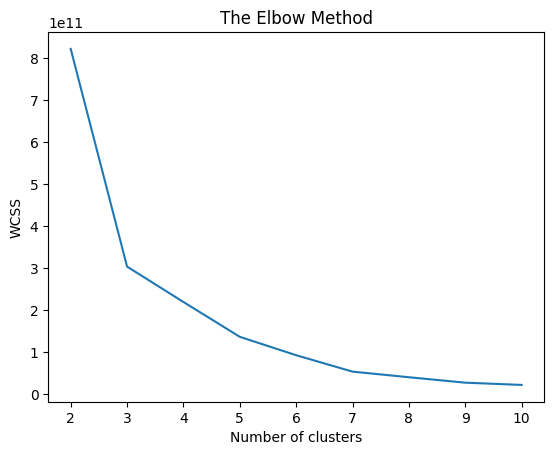

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data0)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
import warnings
xn_clusters = 7

warnings.filterwarnings('ignore')
kmeans = KMeans(n_clusters = xn_clusters, init = "k-means++", random_state = 42).fit(data0)
data0['cluster'] = kmeans.labels_
data0.tail()

,deaths,pulmonaryConfirmado,cluster
570,367.0,16975,0
571,0.0,15949,0
572,0.0,8311,0
573,307.0,8072,0
574,0.0,10061,0


In [ ]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=[columna1, columna2])
centers['freq'] = data0['cluster'].value_counts()
centers['freq_r'] = data0['cluster'].value_counts(normalize=True)
print(centers)

# Agrupar el DataFrame por la columna 'cluster' y obtener los valores máximos
cluster_max_values = data0.groupby('cluster').max()
print(cluster_max_values)

          deaths  pulmonaryConfirmado  freq    freq_r
0    1145.031746          2638.619048   504  0.876522
1       0.000000        895639.000000     2  0.003478
2    2479.611111        127602.055556    19  0.033043
3     947.800000        270004.000000     5  0.008696
4  143355.000000        570237.000000     1  0.001739
5  147677.500000         27660.500000     2  0.003478
6     201.953488         35537.627907    42  0.073043
           deaths  pulmonaryConfirmado
cluster                               
0         64520.0                17331
1             0.0               908925
2         18819.0               190460
3          4739.0               297862
4        143355.0               570237
5        181402.0                45728
6          2268.0                54346


#Visualizacion

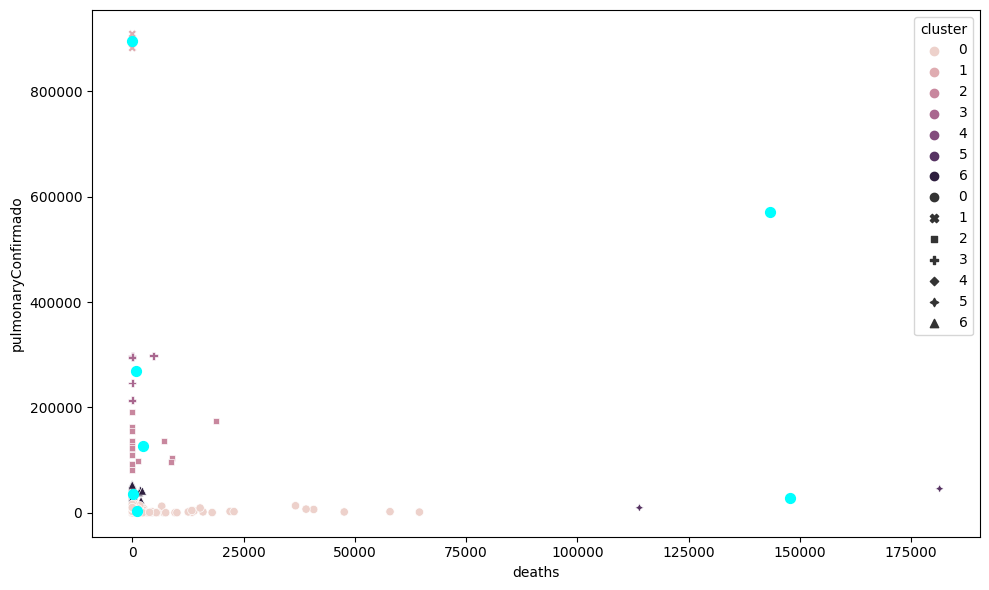

In [ ]:
import seaborn as sns 
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.scatterplot(x=columna1, y=columna2, hue='cluster', style='cluster', 
                     ax=ax, data=data0)
#ax.set_xlim(0, 200000)
#ax.set_ylim(0,)
centers.plot.scatter(x=columna1, y=columna2, ax=ax, s=50, color='cyan')
plt.tight_layout()
plt.show()

# K-means con cuatro variables
¿?

In [ ]:
columna1 = 'year'
columna2 = 'cases'
columna3 = 'deaths'
columna4 = 'pulmonaryConfirmado'
data1 = df_starup[[columna1,columna2, columna3, columna4]]
data1.reset_index(drop=True, inplace=True)
data1.head()

,year,cases,deaths,pulmonaryConfirmado
0,2021,0.0,0.0,24715
1,2020,49273.0,1971.0,22888
2,2019,0.0,0.0,24358
3,2021,0.0,0.0,168
4,2020,48530.0,1003.0,134


## Elbow Method

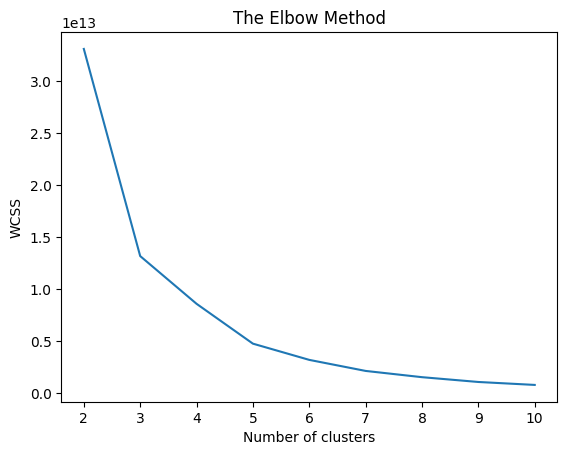

In [ ]:
from sklearn.cluster import KMeans
data_km=data1.copy()
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 12)
    kmeans.fit(data_km)
    wcss.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Definición de clusters

In [ ]:
import warnings
warnings.filterwarnings('ignore')
kmeans1 = KMeans(n_clusters = 5, init = "k-means++", random_state = 42).fit(data_km)
data_km['cluster'] = kmeans1.labels_

centers1 = pd.DataFrame(kmeans1.cluster_centers_, columns=[columna1,columna2, columna3, columna4])

centers1['freq']=data_km['cluster'].value_counts()
centers1['freq_r']=data_km['cluster'].value_counts(normalize=True)
centers1

,year,cases,deaths,pulmonaryConfirmado,freq,freq_r
0,2020.000000,4.899194e+05,10615.227273,25398.590909,22,0.038261
1,2019.996317,1.040544e+04,196.876611,14206.755064,543,0.944348
2,2020.000000,9.884100e+06,143355.000000,570237.000000,1,0.001739
3,2020.000000,6.901952e+06,181402.000000,45728.000000,1,0.001739
4,2020.000000,1.574734e+06,51083.250000,4084.125000,8,0.013913


## Clusters con data transformada (StandardScale)
## K-means

In [ ]:
from sklearn import preprocessing
data_sd = preprocessing.scale(data1)
data_sd = pd.DataFrame(data_sd, columns = [columna1,columna2, columna3, columna4])
data_sd.head()

,year,cases,deaths,pulmonaryConfirmado
0,1.227949,-0.146792,-0.155873,0.138368
1,0.004256,-0.056011,0.008631,0.110887
2,-1.219436,-0.146792,-0.155873,0.132998
3,1.227949,-0.146792,-0.155873,-0.230857
4,0.004256,-0.057380,-0.072160,-0.231368


## Elbow Method

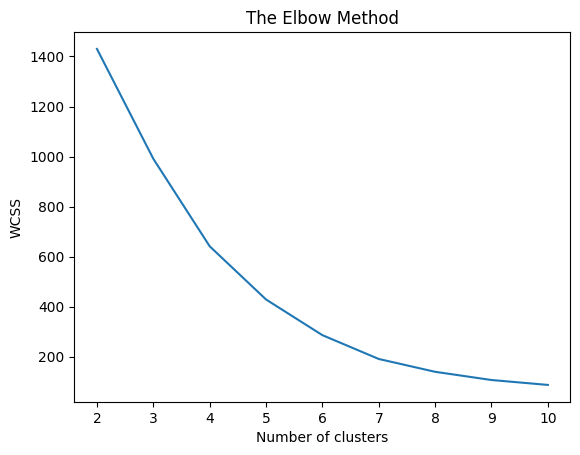

In [ ]:
data_sd_km=data_sd.copy() 
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 12)
    kmeans.fit(data_sd_km)
    wcss.append(kmeans.inertia_)

  
import matplotlib.pyplot as plt
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Definición de clusters data escalada

In [ ]:
import warnings
warnings.filterwarnings('ignore')
kmeans = KMeans(n_clusters = 7, init = "k-means++", random_state = 42).fit(data_sd)
data_sd_km['cluster'] = kmeans.labels_

centers2 = pd.DataFrame(kmeans.cluster_centers_, columns=[columna1,columna2, columna3, columna4])
centers2['freq']=data_sd_km['cluster'].value_counts()
centers2['freq_r']=data_sd_km['cluster'].value_counts(normalize=True)
print(centers2)

       year      cases     deaths  pulmonaryConfirmado  freq    freq_r
0  0.004256   0.034413   0.031432             2.196488    22  0.038261
1  0.004256   0.020004  -0.012342            -0.162568   174  0.302609
2  0.004256  15.316690  13.396619             4.399148     2  0.003478
3  0.004256  -0.146792  -0.155873            13.238408     2  0.003478
4 -1.219436  -0.146792  -0.155873            -0.145088   185  0.321739
5  1.227949  -0.146792  -0.155873            -0.150036   183  0.318261
6  0.004256   2.777416   4.619414            -0.144725     7  0.012174


In [ ]:
data2=data1.copy()
data2['cluster']=data_sd_km['cluster']
Centers_mean=data2.groupby('cluster').mean()
Centers_mean

,year,cases,deaths,pulmonaryConfirmado
cluster,,,,
0,2021.0,0.000000e+00,0.000000,5541.169399
1,2020.0,9.835164e+04,2244.181818,161544.045455
2,2020.0,7.720740e+04,1479.011628,4734.976744
3,2020.0,6.901952e+06,181402.000000,45728.000000
4,2019.0,0.000000e+00,0.000000,5870.124324
5,2020.0,0.000000e+00,0.000000,895639.000000
6,2020.0,1.509205e+06,49482.555556,5115.555556
7,2020.0,9.884100e+06,143355.000000,570237.000000


## Evaluación. Silhouette score

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
data2['S_S'] = silhouette_samples(data_sd_km,data_sd_km['cluster'])
silhouette_score_mean = silhouette_score(data_sd_km,data_sd_km['cluster'])
print(silhouette_score_mean)

0.8779251804951927


In [ ]:
Centers_mean=data2.groupby('cluster').mean()
Centers_mean['freq']=data2['cluster'].value_counts()
Centers_mean['freq_r']=data2['cluster'].value_counts(normalize=True)
Centers_mean

,year,cases,deaths,pulmonaryConfirmado,S_S,freq,freq_r
cluster,,,,,,,
0,2021.0,0.000000e+00,0.000000,5541.169399,0.946676,183,0.318261
1,2020.0,9.835164e+04,2244.181818,161544.045455,0.253199,22,0.038261
2,2020.0,7.720740e+04,1479.011628,4734.976744,0.844801,172,0.299130
3,2020.0,6.901952e+06,181402.000000,45728.000000,0.000000,1,0.001739
4,2019.0,0.000000e+00,0.000000,5870.124324,0.944241,185,0.321739
5,2020.0,0.000000e+00,0.000000,895639.000000,0.791008,2,0.003478
6,2020.0,1.509205e+06,49482.555556,5115.555556,0.491379,9,0.015652
7,2020.0,9.884100e+06,143355.000000,570237.000000,0.000000,1,0.001739


# Cluster Jerárquico toma data transformada (StandardScale, data_sd)
El clustering jerárquico es un algoritmo de agrupamiento que crea una estructura de clusters anidados en forma de un árbol o dendrograma. Este tipo de algoritmo no requiere especificar el número de clusters de antemano y es útil para visualizar la estructura de los datos en diferentes niveles de detalle.
Hay dos enfoques principales para el clustering jerárquico: el enfoque aglomerativo y el enfoque divisivo.

La función scipy.cluster.hierarchy.linkage es una función de la biblioteca SciPy que se utiliza para calcular las distancias entre pares de puntos de datos en el contexto de clustering jerárquico aglomerativo. El método de enlace "ward" minimiza la varianza total dentro de los clusters al fusionarlos. 

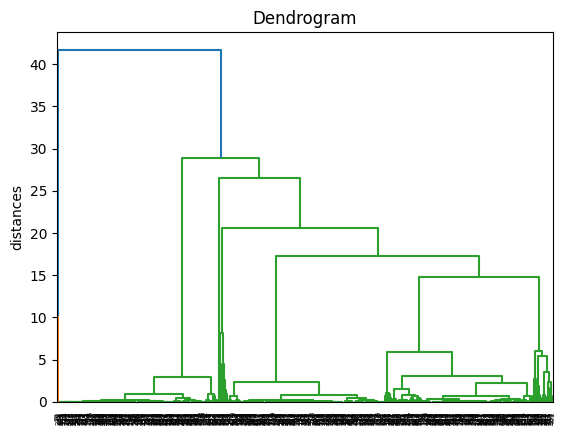

In [ ]:
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
data_sdh=data_sd.copy()
data_sdh1=data_sd.copy()
data1h=data1.copy()
dendrogram = sch.dendrogram(sch.linkage(data_sdh, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('')
plt.ylabel('distances')
plt.show()

## Definición de cluster AgglomerativeClustering y evaluación
El enfoque aglomerativo comienza con cada punto de datos como un cluster individual y fusiona iterativamente los clusters más similares hasta que todos los puntos de datos estén en un solo cluster.

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(data_sdh)
data1h['cluster_hc']=y_hc
data_sdh1['cluster_hc']=y_hc
data1h['S_S_hc'] = silhouette_samples(data_sdh1,data_sdh1['cluster_hc'])
silhouette_score_mean_hc = silhouette_score(data_sdh1,data_sdh1['cluster_hc'])
print(silhouette_score_mean_hc)

0.8948733629236666


In [ ]:
Centers_mean_hc=data1h.groupby('cluster_hc').mean()
Centers_mean_hc['freq_hc']=data1h['cluster_hc'].value_counts()
Centers_mean_hc['freq_r_hc']=data1h['cluster_hc'].value_counts(normalize=True)
Centers_mean_hc

,year,cases,deaths,pulmonaryConfirmado,S_S_hc,freq_hc,freq_r_hc
cluster_hc,,,,,,,
0,2020.000000,8.393026e+06,162378.500000,307982.500000,0.401017,2,0.003478
1,2020.000000,1.509205e+06,49482.555556,5115.555556,0.404680,9,0.015652
2,2020.000000,7.720740e+04,1479.011628,4734.976744,0.883819,172,0.299130
3,2020.000000,0.000000e+00,0.000000,895639.000000,0.779659,2,0.003478
4,2020.043478,9.407548e+04,2146.608696,158559.000000,0.291268,23,0.040000
5,2021.000000,0.000000e+00,0.000000,5061.241758,0.956841,182,0.316522
6,2019.000000,0.000000e+00,0.000000,5870.124324,0.949663,185,0.321739


# DBSCAN toma data transformada (StandardScale, data_sd)
## Definición de clusters y evaluación
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering basado en la densidad que es capaz de encontrar clusters de forma arbitraria en un conjunto de datos. A diferencia de otros algoritmos de clustering, como K-means, DBSCAN no requiere especificar el número de clusters de antemano y puede identificar puntos de datos como ruido o anomalías.


In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
#pip install hdbscan
from sklearn.cluster import DBSCAN
data_sd_db=data_sd.copy()
data1_db=data1.copy()
dbscan = DBSCAN(eps=0.75, min_samples=5).fit(data_sd_db)
#y_dbs = dbscan.fit_predict(data_sd_db)
y_dbs = dbscan.labels_
data_sd_db['cluster_dbs']=y_dbs
silhouette_score(data_sd_db, data_sd_db['cluster_dbs'])

0.7980581157819072

In [ ]:
data1_db['cluster_dbs']=y_dbs
data1_db['S_S_dbs'] = silhouette_samples(data_sd_db,data_sd_db['cluster_dbs'])
silhouette_score_mean_hc = silhouette_score(data_sd_db,data_sd_db['cluster_dbs'])
Centers_mean_dbs=data1_db.groupby('cluster_dbs').mean()
Centers_mean_dbs['freq_dbs']=data1_db['cluster_dbs'].value_counts()
Centers_mean_dbs['freq_r_dbs']=data1_db['cluster_dbs'].value_counts(normalize=True)
Centers_mean_dbs
#Noisy samples are given the label -1.

,year,cases,deaths,pulmonaryConfirmado,S_S_dbs,freq_dbs,freq_r_dbs
cluster_dbs,,,,,,,
-1,2020.0,1.411281e+06,35577.173913,193049.391304,-0.246617,23,0.040000
0,2021.0,0.000000e+00,0.000000,9312.196809,0.873828,188,0.326957
1,2020.0,7.674050e+04,1468.890805,5778.298851,0.768976,174,0.302609
2,2019.0,0.000000e+00,0.000000,9081.168421,0.876180,190,0.330435


Cluster -1: Este cluster se etiqueta como -1, lo que indica que contiene puntos de ruido. Los valores promedio para el año, los casos, las muertes y la confirmación pulmonar son relativamente altos en comparación con los otros clusters. Sin embargo, la puntuación S_S_dbs es negativa (-0.246617), lo que sugiere que estos puntos están en áreas menos densas. Además, la frecuencia relativa de este cluster (freq_r_dbs) es baja (0.040000), lo que indica que estos puntos de ruido representan una pequeña proporción del conjunto de datos.


Cluster 0: Este cluster tiene un valor de año de 2021 y valores cero para casos y muertes. Sin embargo, la confirmación pulmonar es significativa (9312.196809), lo que indica que los puntos en este cluster tienen una alta frecuencia de confirmación pulmonar sin presencia de COVID. La puntuación S_S_dbs es alta (0.873828), lo que sugiere que estos puntos están en áreas densamente pobladas. La frecuencia relativa (freq_r_dbs) también es relativamente alta (0.326957), lo que indica que este cluster representa una proporción significativa de los datos.

Cluster 1: Este cluster tiene un valor de año de 2020 y valores moderados para casos y muertes. La confirmación pulmonar es relativamente baja (5778.298851) en comparación con los otros clusters. La puntuación S_S_dbs es alta (0.768976), lo que indica que estos puntos están en áreas densamente pobladas. La frecuencia relativa (freq_r_dbs) es moderada (0.302609), lo que indica que este cluster representa una proporción moderada de los datos.


Cluster 2: Este cluster tiene un valor de año de 2019 y valores cero para casos y muertes. Sin embargo, al igual que en el Cluster 0, la confirmación pulmonar es significativa (9081.168421), lo que indica una alta frecuencia de confirmación pulmonar. La puntuación S_S_dbs es alta (0.876180), lo que sugiere que estos puntos también están en áreas densamente pobladas. La frecuencia relativa (freq_r_dbs) es alta (0.330435), lo que indica que este cluster representa una proporción significativa de los datos.

También podemos concluir que 3 clusters signifiactivos han agrupados la data.Un número mayor de clusters podría no aportar más información.

## REFERENCIAS

* https://data.europa.eu/euodp/es/data/dataset/covid-19-coronavirus-data
* https://apps.who.int/gho/data/view.main.57080WBIG?lang=en
